In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import time
import re

In [2]:
def loadDataSet(filename):
    data=[]
    with open(filename,'r') as f:
        txt=f.readlines()
        for item in txt:
            #item.replace('\n','').split('\t')
            #print(item.replace('\n','').strip())
            data.append(re.split(r'\s+',item.replace('\n','').strip()))
            #data.append(item.replace('\n','').split(','))
    return data

In [3]:
def standRegres1(X,Y):
    #最小二乘法
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y).reshape(-1,1)


In [33]:
def plotDataSet(DataSet):
    row,col=DataSet.shape
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(DataSet[:,6],DataSet[:,-1],s=20,c='blue',alpha=.5)
    plt.title('DataSet')
    plt.xlabel('X')
    plt.show()
    
def plotDataSet_1(DataSet):
    #最小二乘法求得系数
    row,col=DataSet.shape
    print(DataSet.shape)
    X=DataSet[:,:col-1]
    Y=DataSet[:,-1]

    theta=standRegres1(X,Y)
    print(theta)
    lines_data=X.dot(theta)
    #使用局部加权线性回归
    #lines_data=lwlr(DataSet[:,[0,1]],DataSet[:,-1],0.003)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(X[:,1],lines_data,c='red')
    ax.scatter(X[:,1],Y,s=20,c='blue',alpha=.5)
    plt.title('DataSet')
    plt.xlabel('X')
    print(np.corrcoef(lines_data.T,DataSet[:,-1]))
    plt.show()    

In [8]:
def lwlr(testX,X,Y,K=1.0):
#局部加权线性回归
    testrow,testrowcol=testX.shape#行，列
    row,col=X.shape#行，列
    yhat=np.zeros(row)#用于存高斯核处理得到的预测值
    for i in range(testrow):
        weights=np.eye(row)
        for j in range(row):
            #weights[j,j]=np.exp(np.linalg.norm(testX[i]-X[j])/(-2*K**2))
            diffX=testX[i]-X[j]
            weights[j,j]=np.exp(diffX.dot(diffX.T)/(-2*K**2))
        xTx=X.T.dot(weights).dot(X)    
#         if np.linalg.det(xTx) == 0.0:
#             print("矩阵为奇异矩阵,不能求逆")
#             return
#       ws=np.linalg.inv(xTx).dot(X.T).dot(weights).dot(Y)
        ws=np.linalg.pinv(xTx).dot(X.T).dot(weights).dot(Y)
        yhat[i]=testX[i].dot(ws.T)
    #根据测试输入值输出预测值
    return yhat

In [9]:
def plotlwlrRegression(DataSet):
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)                                #加载数据集
    row,col=DataSet.shape
    xArr=DataSet[:,:col-1]
    yArr=DataSet[:,-1]
    yHat_1 = lwlr(xArr,xArr, yArr, 1.0)                            #根据局部加权线性回归计算yHat
    yHat_2 = lwlr(xArr,xArr, yArr, 0.01)                            #根据局部加权线性回归计算yHat
    yHat_3 = lwlr(xArr,xArr, yArr, 0.003)                            #根据局部加权线性回归计算yHat
    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵
    srtInd = xMat[:, 1].argsort(0)                                        #排序，返回索引值
    xSort = xMat[srtInd][:,0,:]
    fig, axs = plt.subplots(nrows=3, ncols=1,sharex=False, sharey=False, figsize=(10,8))                                        
    axs[0].plot(xSort[:, 1], yHat_1[srtInd], c = 'red')                        #绘制回归曲线
    axs[1].plot(xSort[:, 1], yHat_2[srtInd], c = 'red')                        #绘制回归曲线
    axs[2].plot(xSort[:, 1], yHat_3[srtInd], c = 'red')                        #绘制回归曲线
    axs[0].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[1].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[2].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0].set_title(u'局部加权回归曲线,k=1.0',FontProperties=font)
    axs1_title_text = axs[1].set_title(u'局部加权回归曲线,k=0.01',FontProperties=font)
    axs2_title_text = axs[2].set_title(u'局部加权回归曲线,k=0.003',FontProperties=font)
    plt.setp(axs0_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs1_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs2_title_text, size=8, weight='bold', color='red')  
    plt.xlabel('X')
    plt.show()

In [12]:
#计算误差    
def rssError(Y,Yhat):
    return ((Y-Yhat)**2).sum()

k=0.1时,误差大小为: 167.6622594878837
k=1  时,误差大小为: 1371.2795437115658
k=10 时,误差大小为: 2251.273082191463

训练集与测试集不同:局部加权线性回归,核k的大小是越小越好吗？更换数据集,测试结果如下:
k=0.1时,误差大小为: 11720.396937635176
k=1  时,误差大小为: 10459.043207866385
k=10 时,误差大小为: 10189.598052327781
训练集与测试集不同:简单的线性归回与k=1时的局部加权线性回归对比:
k=1时,误差大小为: 10459.043207866385
简单的线性回归误差大小: 9200.917642234794
(506, 3)
[[-34.67062078]
 [  9.10210898]]
[[1.         0.69535995]
 [0.69535995 1.        ]]


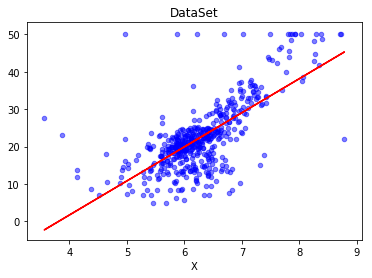

In [35]:
#Data=loadDataSet('ex1data1.txt')
Data=loadDataSet('housing.data')
DataSet=np.array(Data).astype(float)
row,col=DataSet.shape
DataSet=np.append(np.ones((row,1)),DataSet,axis=1)
#lwlr(DataSet[:,[0,6]],DataSet[:,[0,6]],DataSet[:,-1])
DataSet = np.delete(DataSet, 4, axis=1)
row,col=DataSet.shape
abX=DataSet[0:99,[0,6]]
abY=DataSet[0:99,-1]
yHat01 = lwlr(abX,abX,abY,0.1)
yHat1 = lwlr(abX,abX,abY,1)
yHat10 = lwlr(abX,abX,abY,10)
print('k=0.1时,误差大小为:',rssError(abY[0:99], yHat01.T))
print('k=1  时,误差大小为:',rssError(abY[0:99], yHat1.T))
print('k=10 时,误差大小为:',rssError(abY[0:99], yHat10.T))
print('')
print('训练集与测试集不同:局部加权线性回归,核k的大小是越小越好吗？更换数据集,测试结果如下:')
testabX=DataSet[100:199,[0,6]]
testabY=DataSet[100:199,-1]
yHat01 = lwlr(testabX, abX, abY, 0.1)
yHat1 = lwlr(testabX, abX, abY, 1)
yHat10 = lwlr(testabX, abX, abY, 10)

print('k=0.1时,误差大小为:',rssError(testabY, yHat01.T))
print('k=1  时,误差大小为:',rssError(testabY, yHat1.T))
print('k=10 时,误差大小为:',rssError(testabY, yHat10.T))
print('训练集与测试集不同:简单的线性归回与k=1时的局部加权线性回归对比:')
print('k=1时,误差大小为:', rssError(testabY, yHat1.T))
ws = standRegres1(abX, abY)
yHat = testabX.dot(ws)
print('简单的线性回归误差大小:', rssError(testabY, yHat.T))
#plotlwlrRegression(DataSet[:,[0,6,-1]])
#plotDataSet(DataSet)
#theta=standRegres1(DataSet[:,:col],DataSet[:,-1])
plotDataSet_1(DataSet[:,[0,5,-1]])